<a href="https://colab.research.google.com/github/mathjams/machine-learning-basics/blob/main/supervised_learning_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

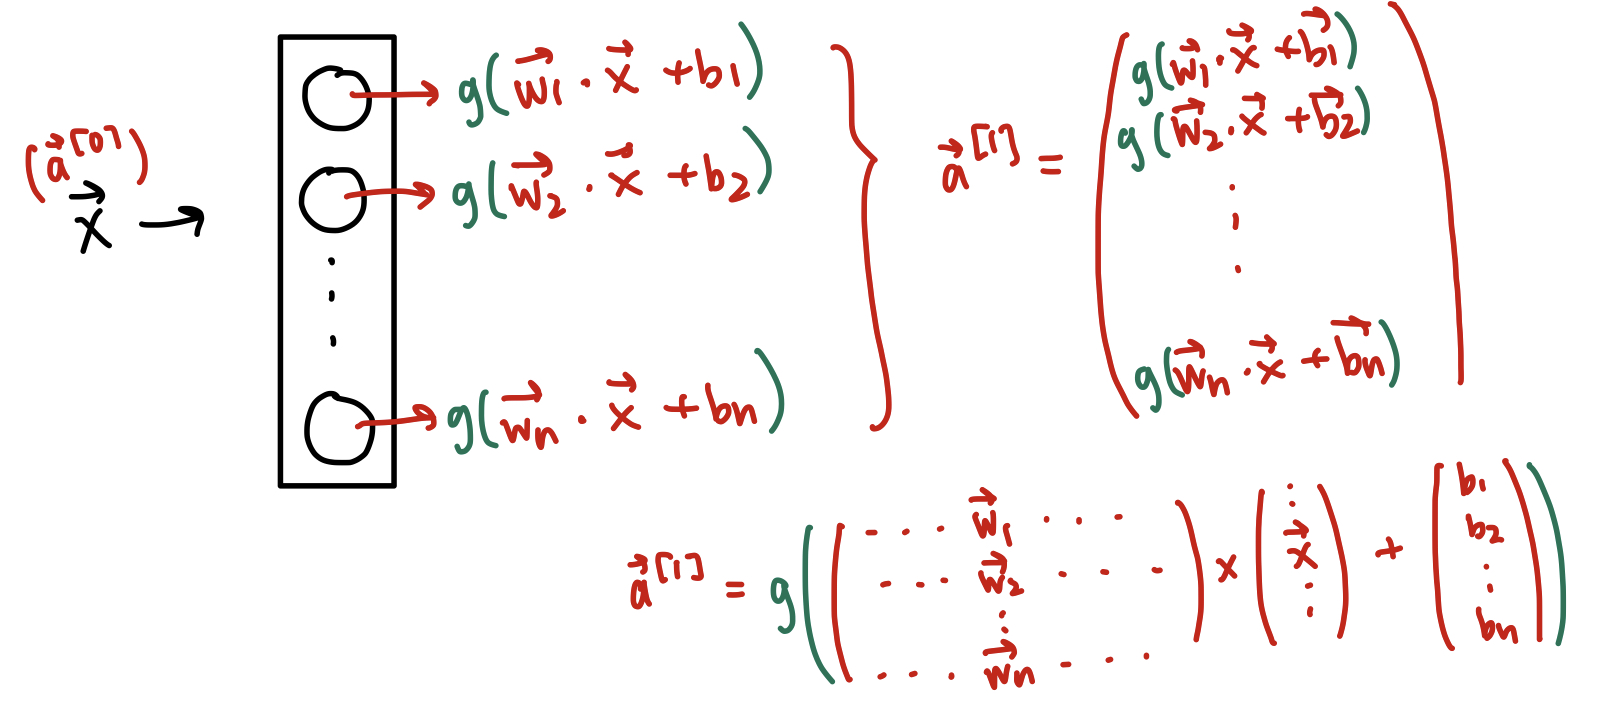

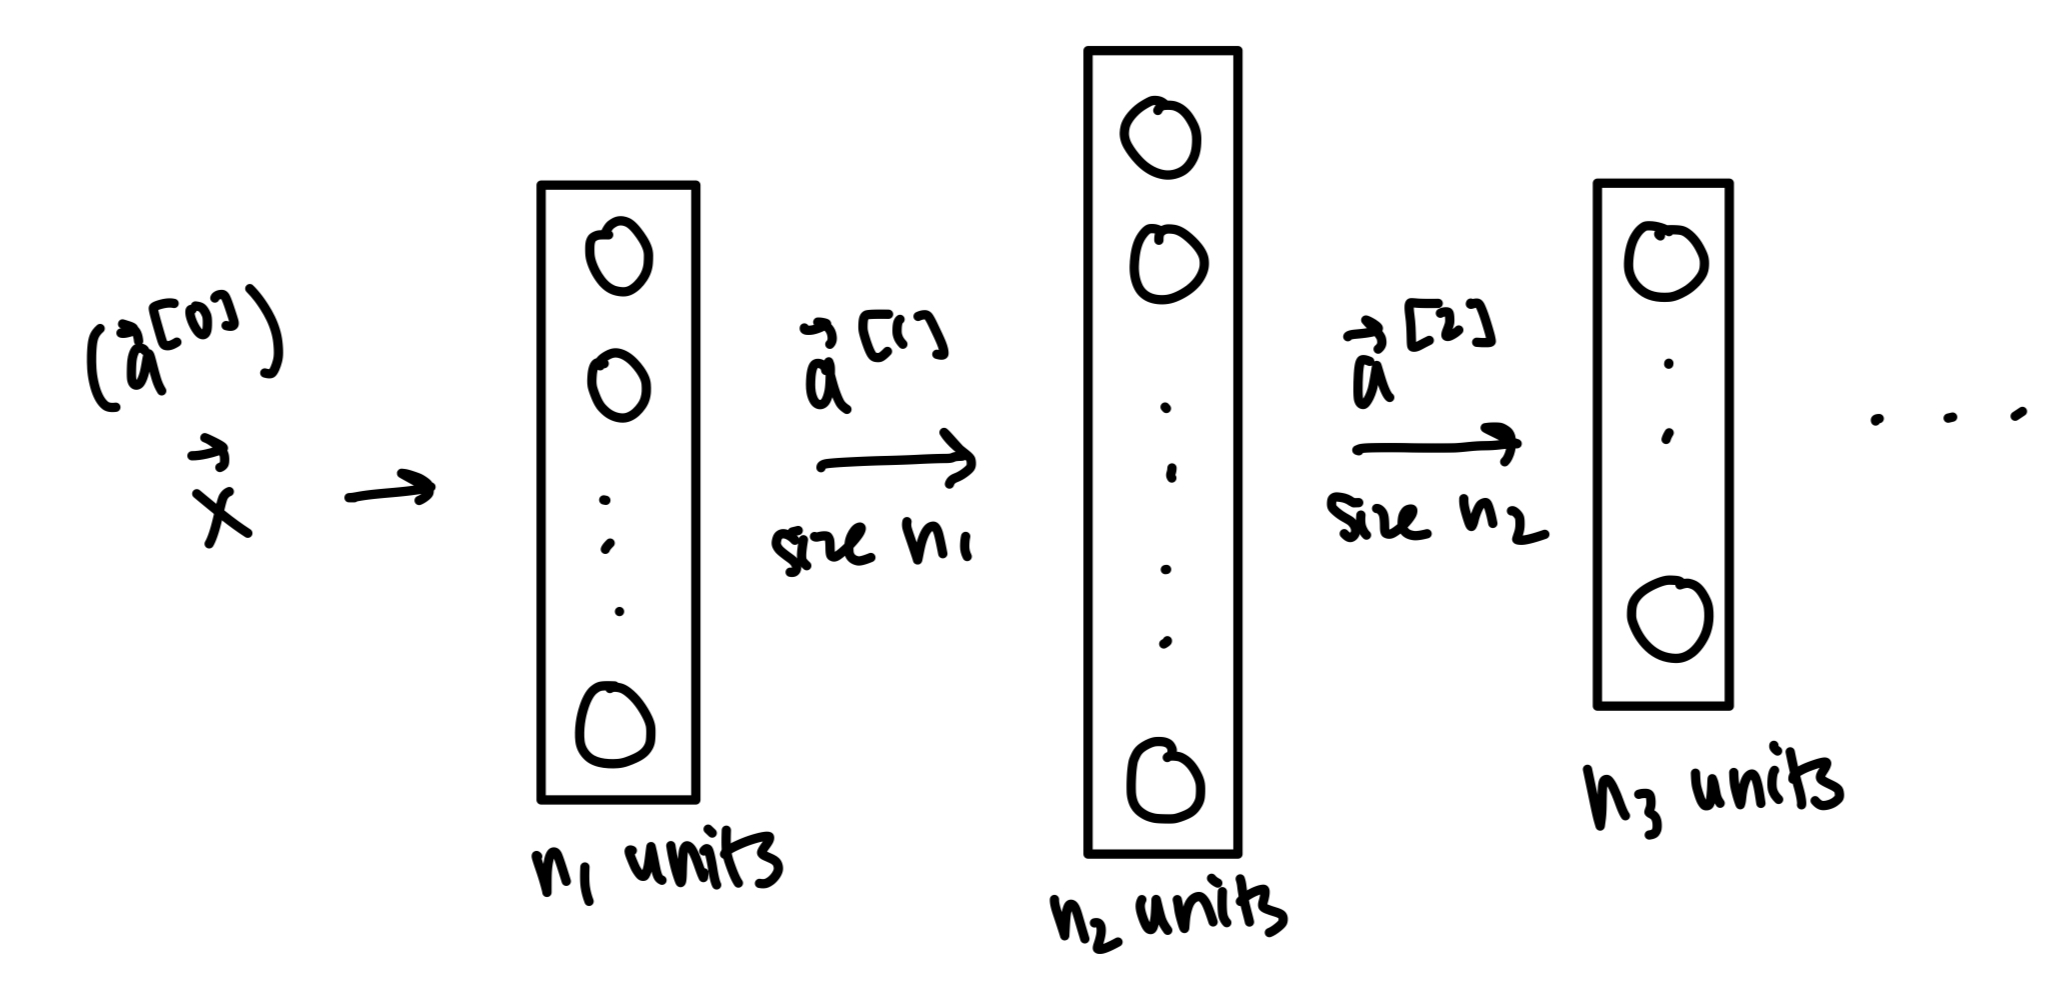

A Neural Network is a more intricate application or using logistic and linear regression. Each layer consists of serveral neurons, or units, which all have their own set parameters of $\vec{w}, b$, and returns $g(\vec{w}\cdot \vec{x}+b)$, where $g$ is the activation function. The most common activation functions are **relu, sigmoid, and linear.** We've seen sigmoid and linear already, but how the relu function is defined is $g(x)=x$ for $x\geq 0$ and $0$ for $x\leq 0$.

For better compactness, we can put the $n$ vectors into a matrix, where each row is $\vec{w_i}$ and then multiply it with $\vec{x}$ and add $\vec{b}$, to get that $\vec{a}^{[1]}=g(W\times \vec{x}+\vec{b})$. This is a very fast computation through Python, utilizing vectorization.
Here is an example of the calculation of a Dense layer:

In [ ]:
def my_dense(a_in, W, b, g): #not vectorized
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        z=np.dot(a_in,W[:,i])+b[i]
        a_out[i]=g(z)
    return(a_out)

In [ ]:
def my_dense_v(A_in, W, b, g): #vectorized
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
    Z=np.matmul(A_in,W)+b
    A_out=g(Z)
    return(A_out)

We can denote $a_j^{[i]}$ to be the $j$th component of the vector $\vec{a}^{[i]}$.

Actually, if we have all examples of $\vec{x}$ in a matrix $X$, we can use vectorization to return all activation $a$ by using $A=XW+\vec{b}$.

In general, we can find that $\vec{a}^{[i+1]}=g(W_i\times \vec{a}^{[i]}+\vec{b_i})$, where $g$ is applied to each term in the vector (like the sigmoid function coded in the last notebook).

Additionally, if our original vector had size $n_0$, and the subsequent layers have size $n_1, n_2, \dots n_i, \dots$ then note that $\vec{a}^{[i]}$ has size $n_i$ (where $\vec{x}= \vec{a}^{[0]}$), so $W_i$ has size $n_{i-1}\times n_i$ and $b_i$ has size $n_i$.

Currently, we are using **Dense** layers, where every single component of $\vec{a}$, the activation function, is being fed into the layer. The layers in the middle are called **hidden layers** while the last layer is called the **output layer**.

We will show how to build a model below.

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #specify input size
        Dense(units=25, activation="sigmoid"),
        Dense(units=15, activation="sigmoid"),
        Dense(units=1, activation="sigmoid")
    ], name = "my_model"
)
model.summary() #shows the structure of of the neural network
layer1.get_weights() #shows the shape of W1 and b1

This creates the input and layers, and also specifices the activation function. The Param # shows the number of elements in the weight and bias arrays. In this case, the number of parameters in layer one is $400\cdot 25+25$.

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

This specifices the loss function that gradient descent will be run on (BinaryCrossentropy is the same as the logistic loss function). The optimizer decides which type of gradient descent is run, in this case we use Adam, with learning rate $\alpha$ set as $0.001$.

The model.fit chooses the training data and the number of epochs, which is the number of times gradient descent will be run. To now use this model for a prediction, use:

In [ ]:
model.predict(X) #where X is the input of what you want to predict

For the output layer, one activation function that can be used for a probability distribution (discrete values such as digit recognition) is the **softmax function.** How the softmax function works is given a vector of values $\vec{z}=[z_1, z_2, \dots z_n]$ (which are found as $\vec{z}=W_n\times \vec{a}^{n}+\vec{b}^{n}.$, the softmax function returns the vector $$\vec{a}=[\frac{e^{z_1}}{e^{z_1}+\dots e^{z_n}}, \dots, \frac{e^{z_i}}{e^{z_1}+\dots e^{z_n}}, \dots]$$ as the probability distribution.

Below is a code of the softmax function.

In [ ]:
import math
def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    a=np.zeros(z.shape[0])
    sum=0
    for i in range(z.shape[0]):
        sum+=math.exp(z[i])
    for i in range(z.shape[0]):
        a[i]=math.exp(z[i])/sum
    return a

When constructing a softmax application, make the last layer linear and apply the softmax separately. To do this, we can change the loss into:

In [ ]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The logits=True specifies that the softmax should be included in the loss calculation.

In [ ]:
prediction_p = tf.nn.softmax(prediction) #this gives the softmax values
yhat = np.argmax(prediction_p) #choose the one with the highest probability